<a href="https://colab.research.google.com/github/suryamanoj4/forage-british-airways_virtual_experience/blob/main/forage_british_airlines_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
##data analysis

df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [ ]:
df.shape

(50000, 14)

In [ ]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [ ]:
x=df.drop('booking_complete',axis=1)
y=df.booking_complete

for colname in x.select_dtypes("object"):
  x[colname],_=x[colname].factorize()

In [ ]:
x.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores=mutual_info_classif(x,y)
mi_scores=pd.Series(mi_scores,name="MI Scores",index=x.columns)
mi_scores=mi_scores.sort_values(ascending=False)

mi_scores

route                    0.050706
booking_origin           0.049725
flight_duration          0.015069
length_of_stay           0.008860
wants_extra_baggage      0.008537
wants_in_flight_meals    0.006480
wants_preferred_seat     0.004947
num_passengers           0.002860
flight_day               0.002389
flight_hour              0.002309
purchase_lead            0.001974
sales_channel            0.001240
trip_type                0.000000
Name: MI Scores, dtype: float64

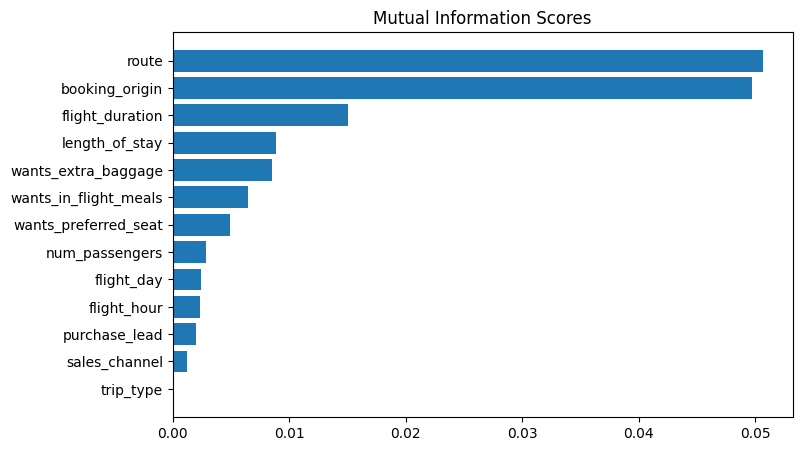

In [ ]:
##data visualization

def plot_mi_scores(scores):
  scores=scores.sort_values(ascending=True)
  width=np.arange(len(scores))
  ticks=list(scores.index)
  plt.barh(width,scores)
  plt.yticks(width,ticks)
  plt.title("Mutual Information Scores")

plt.figure(dpi=100,figsize=(8,5))
plot_mi_scores(mi_scores)

in the above plot we can see the top 5 most important features, which are
route
booking_origin
flight_duration
length_of_stay
wants_extra_baggage

In [ ]:
##data splitting

from sklearn.model_selection import train_test_split

def dataset(x,y):
  train_full_x,val_x,train_full_y,val_y=train_test_split(x,y,test_size=0.2,random_state = 0)
  train_x,test_x,train_y,test_y=train_test_split(train_full_x,train_full_y,test_size=0.25,random_state=0)
  return (train_x,val_x,train_y,val_y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scaler(x):
  scaler=MinMaxScaler()
  scaler.fit(x)
  return x

In [ ]:
##model implementation
##1.random forest classifier with top six features
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

features=['route','booking_origin','flight_duration','wants_extra_baggage','length_of_stay','num_passengers']
x=df[features]

x=pd.get_dummies(x,columns=features)
x=scaler(x)
y=df.booking_complete

x_train,x_val,y_train,y_val=dataset(x,y)
forest_model=RandomForestClassifier(random_state=1)
forest_model.fit(x_train,y_train)
pred=forest_model.predict(x_val)

print('ACCURACY:',accuracy_score(y_val,pred)*100)
print('AUC score:',roc_auc_score(y_val,pred))

ACCURACY: 83.36
AUC score: 0.5657818407546988


In [ ]:
##2.RandomForest with all features
x=df.drop('booking_complete',axis=1)
x=pd.get_dummies(x)
x=scaler(x)
y=df.booking_complete

x_train,x_val,y_train,y_val=dataset(x,y)

forest_model=RandomForestClassifier(random_state=1)
forest_model.fit(x_train,y_train)
pred=forest_model.predict(x_val)

print('ACCURACY:',accuracy_score(y_val,pred)*100)
print('AUC score:',roc_auc_score(y_val,pred))

ACCURACY: 84.76
AUC score: 0.5479604084813514


In [ ]:
##XGB classifier with top sic features

from xgboost import XGBClassifier

x=df[features]
x=pd.get_dummies(x,columns=features)
x=scaler(x)

y=df.booking_complete

x_train,x_val,y_train,y_val=dataset(x,y)

xgb_model=XGBClassifier()
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_val)
print('ACCURACY:',accuracy_score(y_val,pred_xgb)*100)
print('AUC score:',roc_auc_score(y_val,pred_xgb))

ACCURACY: 84.78999999999999
AUC score: 0.5231540310747802


In [ ]:
##XGB classifier with all features
x=df.drop('booking_complete',axis=1)
x=pd.get_dummies(x)
x=scaler(x)
y=df.booking_complete

x_train,x_val,y_train,y_val=dataset(x,y)

xgb_model=XGBClassifier()
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_val)
print('ACCURACY:',accuracy_score(y_val,pred_xgb)*100)
print('AUC score:',roc_auc_score(y_val,pred_xgb))

ACCURACY: 84.96000000000001
AUC score: 0.5431644571912829


In [ ]:
##randomforest with complete all dataset without validation
x=df.drop('booking_complete',axis=1)
x=pd.get_dummies(x)
x=scaler(x)
y=df.booking_complete

train_full_x,test_x,train_full_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

forest_model=RandomForestClassifier(random_state=1)
forest_model.fit(train_full_x,train_full_y)
preds=forest_model.predict(test_x)

print('ACCURACY:',accuracy_score(test_y,preds)*100)
print('AUC score:',roc_auc_score(test_y,preds))

ACCURACY: 85.09
AUC score: 0.5577796717361984
